In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# assign path
path1, dirs1, files1 = next(os.walk("./onceperfill/")) #246iov
file_countopf = len(files1)

# assign path
path2, dirs2, files2 = next(os.walk("./twiceperweek/"))#54iov
file_counttpw = len(files2)

# create empty lists
dfs_listopf = []
dfs_listtpw = []
filenameopf = []
filenametpw = []
# append datasets to the list
for i in range(file_countopf):
    temp_df = pd.read_csv("./onceperfill/"+files1[i])
    names = files1[i]
    filenameopf.append(names)
    dfs_listopf.append(temp_df)  

for i in range(file_counttpw):
    temp_df = pd.read_csv("./twiceperweek/"+files2[i])
    names = files2[i]
    filenametpw.append(names)
    dfs_listtpw.append(temp_df)

# display datsets
#for dataset in dfs_listtpw:
#    display(dataset)
filenameopf = [x.replace('_246', '') for x in filenameopf]
filenameopf = [x.replace('.csv', '') for x in filenameopf]
filenametpw = [x.replace('_54', '') for x in filenametpw]
filenametpw = [x.replace('.csv', '') for x in filenametpw]

#filenametpw
filenameopf

['6942',
 '6929',
 '6939',
 '6953',
 '6931',
 '6923',
 '6940',
 '6927',
 '6944',
 '6946',
 '6924',
 '6925']

In [29]:
# set index to L1SeedName and print the rate0
rateopf = []
ratetpw = []
for df in dfs_listopf:
    df.set_index('L1SeedName', inplace=True)
    df = df.loc['L1_SingleIsoEG28er2p5']
    df = df.reset_index()
    l = df.iloc[2]['L1_SingleIsoEG28er2p5']
    rateopf.append(l)
    
for df in dfs_listtpw:
    df.set_index('L1SeedName', inplace=True)
    df = df.loc['L1_SingleIsoEG28er2p5']
    df = df.reset_index()
    l = df.iloc[2]['L1_SingleIsoEG28er2p5']
    ratetpw.append(l)

In [32]:
df_opf = pd.DataFrame({'Fill_Number':filenameopf, 'rate':rateopf})
df_opf = df_opf.sort_values(by=['Fill_Number'])
df_tpw = pd.DataFrame({'Fill_Number':filenametpw, 'rate':ratetpw})
df_tpw = df_tpw.sort_values(by=['Fill_Number'])
display(df_opf)
display(df_tpw)
#df.plot('run_number', 'rate', kind='scatter',marker="+")

,Fill_Number,rate
5,6923,16161.200000
10,6924,16692.350000
11,6925,20363.700000
7,6927,13018.300000
1,6929,21583.400000
4,6931,15227.100000
2,6939,21955.700000
6,6940,14409.197143
0,6942,15545.367500
8,6944,19721.850000


,Fill_Number,rate
3,6923,15970.000000
1,6924,16214.600000
6,6925,19523.900000
11,6927,12120.500000
8,6929,20542.000000
4,6931,15300.300000
10,6939,20014.950000
2,6940,13785.921429
5,6942,14729.567500
9,6944,18106.100000


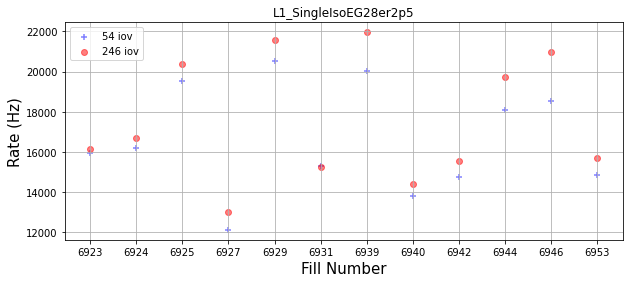

In [33]:
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_tpw["Fill_Number"],df_tpw["rate"],color="blue",marker="+", alpha=0.5)
ax.scatter(df_opf["Fill_Number"],df_opf["rate"],color="red",marker="o", alpha=0.5)
ax.set_xlabel('Fill Number', fontsize=15)
ax.set_ylabel('Rate (Hz)', fontsize=15)
ax.set_title('L1_SingleIsoEG28er2p5')
ax.legend(['54 iov','246 iov'])
ax.grid(True)
#fig.tight_layout()

plt.show()